In [12]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

import exoarch

from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_finder_image

In [43]:
kic = exoarch.KICatalog().df

In [26]:
kic_tgas = pd.read_csv("data/kic_tgas.csv")

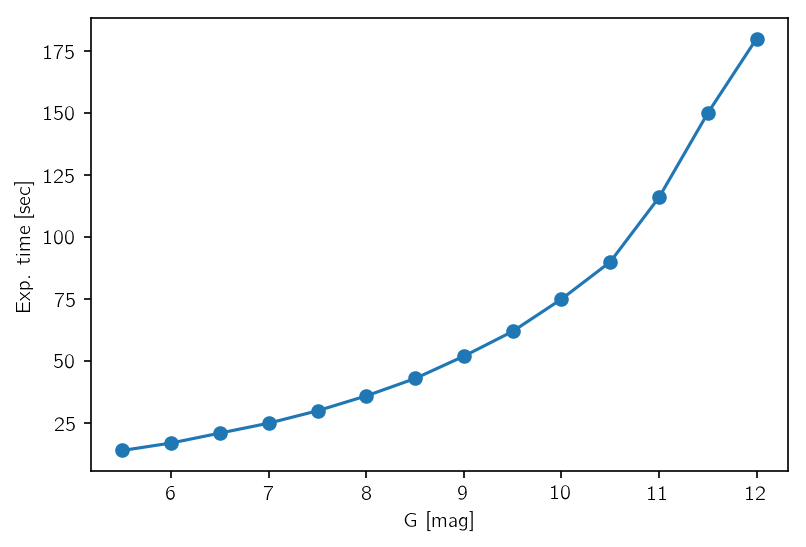

In [24]:
# return exptime in seconds given G mag
mag2exp = interpolate.interp1d(
    np.linspace(5.5, 12.0, 14), [14, 17, 21, 25, 30, 36, 43, 52, 62, 75, 90, 116, 150, 180],
    fill_value='extrapolate')

mags = np.linspace(5.5, 12.0, 14)
plt.plot(mags, mag2exp(mags), 'o-');
plt.xlabel('G [mag]')
plt.ylabel('Exp. time [sec]');

In [58]:
kepid = 7680114

if np.any(kepid == kic_tgas.kepid):
    star = kic_tgas[kic_tgas.kepid == kepid].iloc[0]
    mag = star.tgas_phot_g_mean_mag
else:
    star = kic[kic.kepid == kepid].iloc[0]
    mag = star.kepmag
exp_time = float(mag2exp(mag))
print(kepid, mag, exp_time)

7680114 9.9750083954 74.3502182803866


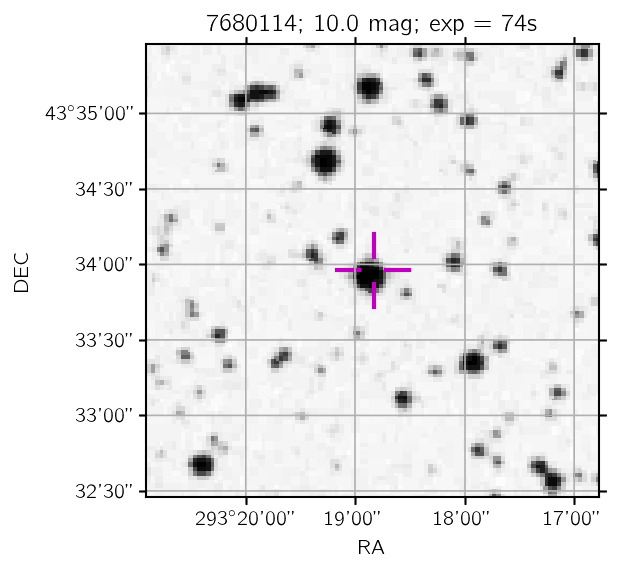

In [59]:
ax, _ = plot_finder_image(SkyCoord(ra=293.314346*u.degree, dec=43.565999*u.degree),
                          fov_radius=3*u.arcmin, reticle=True)
ax.set_title("{0}; {1:.1f} mag; exp = {2:.0f}s".format(kepid, mag, exp_time));